<a href="https://colab.research.google.com/github/manishsinha44/Machine-Learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Preprocessing**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing Training Data**

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

**Feature Scaling**

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

**Creating a data structure with 60 timesteps and 1 output**
*(60 timesteps is the historical period which the RNN will refer to predict the next day's price)*

In [5]:
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [6]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [7]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

**Reshaping**

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

##**Creating the RNN**

**Importing the Libraries**

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
regressor = Sequential()

**Adding the first LSTM layer and some Dropout regularisation**

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

**Adding the second LSTM layer and some Dropout regularisation**

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

**Adding Third LSTM Layer**

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

**Adding Fourth LSTM layer**

In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

**Adding output Layer**

In [15]:
regressor.add(Dense(units = 1))

**Compiling the RNN**

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

**Fitting RNN Layer to Training Data**

In [17]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 115ms/step - loss: 0.0377
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0069
Epoch 4/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0040
Epoch 13/100

## Making the Predictions 

**Getting Real stock price of 2017 from test data**

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

**Getting prediction for stock price**

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

**Visualize the results**

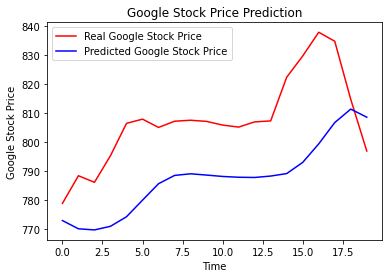

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [21]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])